# Web Scraping Video Game Scores From MetaCritic

In [15]:
import requests #using requests models 
import bs4 #beautiful soup for traversing html 
import re #regular expressions 
import pandas as pd #pandas to hold data

In [16]:
def requestPage(url,userAgent): 
    '''
    The purpose of this function is for the client to request a session with metacritic 
    -input: 
        url: a url for the page you are trying to request. 
        userAgent: the user who is trying to access the page 
    -output: a media company's metacritic page in lxml format 
    '''
    s = requests.Session()
    headers = {'User-Agent': userAgent}
    r = s.get(url,headers=headers)
    soup = bs4.BeautifulSoup(r.content, 'lxml') 
    return soup

In [17]:
def fetch(page): 
    '''
    This is function uses regular expression and beautiful soup to extract the specific data we want from 
    the lxml formated metacritic page. 
    -input: a media companies metacritic page in lxml format 
    -output: the year, user score, and meta score of a media company's media 
    '''
    tree = page.find_all('tr',class_='alt')
    # year: 
    year = [tree[item].find('td',class_='year').text for item in range(len(tree))]
    # user scores: 
    regexUserScore = re.compile('data textscore textscore_.')
    userscores = [tree[item].find('span',class_= regexUserScore).text for item in range(len(tree))]
    # meta scores: 
    regexMetaScore = re.compile('metascore_w small game.')
    metascores= [tree[item].find('span',class_= regexMetaScore).text for item in range(len(tree))]
    
    return year, userscores, metascores


In [18]:
def main(url): 
    '''
    This is function pulls together the requestPage() and fetch() function to build a pandas data frame 
    from a media company's metacritic page
    -input: a url 
    -output: a pandas data frame of the year, user score, 
    and meta score of a media company's media.  
    '''
    flatten = lambda l: [item for sublist in l for item in sublist]
    yearColumn = []
    userColumn = []
    metaColumn = [] 
    for index in range(0,6): 
        page = requestPage(url + '?page=' + str(index),'Mozilla/5.0')
        year,user,meta = fetch(page)
        yearColumn.append(year)
        userColumn.append(user)
        metaColumn.append(meta)
    yearColumn = flatten(yearColumn)
    userColumn = flatten(userColumn)
    metaColumn = flatten(metaColumn)
    table = pd.DataFrame(
    {'date': yearColumn,
     'user': userColumn,
     'meta': metaColumn
    })
    return table

In [19]:
##We call our main function with a metacritic url 
table = main('http://www.metacritic.com/company/bioware')
##Cleaning up the dates 
table['date'] = table['date'].str.replace('\n\s+', '')
table['year'] = table['date'].str.replace('.+,', '')

In [27]:
##We can use the .head() to inspect our data frame 
table.head() 

,date,meta,user,year
0,"Feb 22, 2019",tbd,tbd,2019
1,"Mar 21, 2017",72,4.9,2017
2,"Mar 21, 2017",71,4.9,2017
3,"Oct 6, 2015",tbd,6.8,2015
4,"Sep 9, 2015",77,7.6,2015


In [28]:
##We can take a look at the mean user rating over time 
time = userGraph.groupby('year').agg({'user': 'mean'})
time = time.reset_index(drop=False)
time

,year,user
0,1998,8.900000
1,2000,7.900000
2,2001,8.500000
3,2002,8.100000
4,2003,9.000000
5,2004,8.800000
6,2005,7.900000
7,2007,8.200000
8,2008,8.600000
9,2009,7.080000


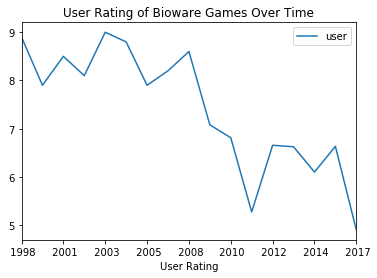

In [23]:
##and plot it with matplotlib
import matplotlib.pyplot as plt
a = time.plot(x='year', y='user')
a.set_xlabel('year')
a.set_xlabel('User Rating')
a.set_title('User Rating of Bioware Games Over Time')
plt.show()


We can see that it looks like user approval has declined over time. 

In [30]:
##We can take a look at the mean meta scores over time 
time2 = metaGraph.groupby('year').agg({'meta': 'mean'})
time2 = time2.reset_index(drop=False)
time2

,year,meta
0,1998,91.000000
1,2000,83.000000
2,2001,80.000000
3,2002,91.000000
4,2003,93.500000
5,2007,81.000000
6,2008,89.000000
7,2009,88.500000
8,2010,72.090909
9,2011,76.714286


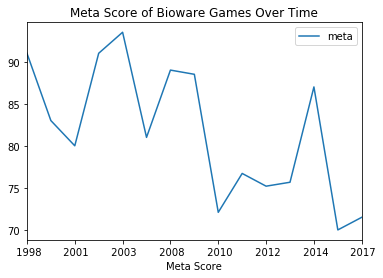

In [31]:
import matplotlib.pyplot as plt
a = time2.plot(x='year', y='meta')
a.set_xlabel('year')
a.set_xlabel('Meta Score')
a.set_title('Meta Score of Bioware Games Over Time')
plt.show()

The trend appears a little less certain for the meta score. 